In [1]:
import glob
from matplotlib import pyplot
import numpy
import pandas

In [2]:
# read in data
filenames = glob.glob("data/sample.csv")
print(filenames)
df = pandas.concat([pandas.read_csv(f) for f in filenames], ignore_index=True)

['data/sample.csv']


In [3]:
# convert starttime/stoptime to datetime
df['starttime'] = pandas.to_datetime(df['starttime'])
df['stoptime'] = pandas.to_datetime(df['stoptime'])
df.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                  float64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                    float64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                          int64
gender                              int64
dtype: object

In [4]:
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1277,2018-10-09 17:20:57.422,2018-10-09 17:42:14.569,3323.0,W 106 St & Central Park West,40.798186,-73.960591,3495.0,E 114 St & 1 Ave,40.794566,-73.936254,20688,Customer,1969,0
1,1115,2018-10-03 09:16:39.238,2018-10-03 09:35:14.756,3373.0,3 St & 3 Ave,40.675070,-73.987752,3562.0,Classon Ave & St Marks Ave,40.676520,-73.959608,33051,Subscriber,1989,1
2,1109,2018-10-07 09:02:33.519,2018-10-07 09:21:03.463,253.0,W 13 St & 5 Ave -moved to 5947.04,40.735439,-73.994539,253.0,W 13 St & 5 Ave -moved to 5947.04,40.735439,-73.994539,34788,Subscriber,1976,1
3,115,2018-10-19 15:06:52.994,2018-10-19 15:08:48.333,261.0,Johnson St & Gold St,40.694749,-73.983625,239.0,Willoughby St & Fleet St,40.691966,-73.981302,32187,Subscriber,1982,1
4,770,2018-10-15 21:08:56.050,2018-10-15 21:21:46.721,2022.0,E 60 St & York Ave,40.759107,-73.959223,528.0,2 Ave & E 31 St,40.742909,-73.977061,35228,Subscriber,1967,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754827,717,2018-03-26 15:53:13.221,2018-03-26 16:05:10.384,3379.0,E 103 St & Lexington Ave,40.790305,-73.947558,3135.0,E 75 St & 3 Ave,40.771129,-73.957723,15043,Subscriber,1965,2
1754828,1862,2018-03-17 16:32:32.029,2018-03-17 17:03:34.194,3352.0,Sigourney St & Columbia St,40.672672,-74.008795,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,17797,Subscriber,1986,2
1754829,258,2018-03-23 08:03:50.460,2018-03-23 08:08:09.238,517.0,Pershing Square South,40.751581,-73.977910,472.0,E 32 St & Park Ave,40.745712,-73.981948,32459,Subscriber,1972,1
1754830,932,2018-03-05 18:01:29.575,2018-03-05 18:17:02.492,3443.0,W 52 St & 6 Ave,40.761330,-73.979820,501.0,FDR Drive & E 35 St,40.744219,-73.971212,14890,Subscriber,1977,1


In [5]:
# get additional features from starttime
df['dayofweek'] = df['starttime'].dt.dayofweek
df['weekofyear'] = df['starttime'].dt.isocalendar().week
df['hour'] = df['starttime'].dt.hour

<AxesSubplot: xlabel='usertype', ylabel='Number'>

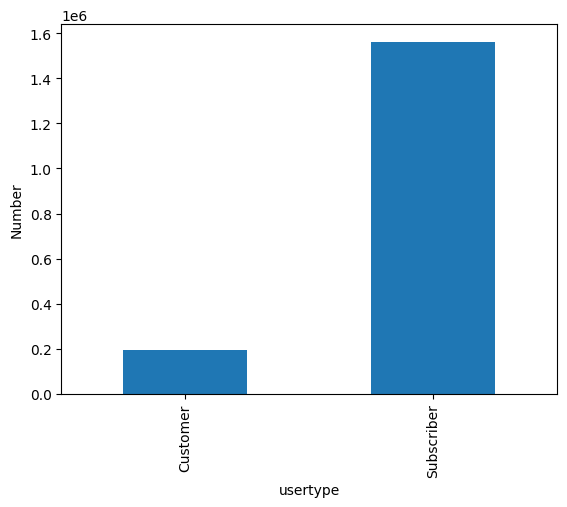

In [6]:
# plot frequency of labels
grouped_df = df.groupby('usertype')
grouped_df['usertype'].count().plot(kind='bar', ylabel='Number')

In [7]:
# plot numeric column histogram from 0.05 to 0.95 x values
def plot_numeric_column_histograms(df, column_name):
    x = df[df.usertype=='Customer'][column_name]
    x_weights = numpy.full(len(x),1/len(x))
    y = df[df.usertype=='Subscriber'][column_name]
    y_weights = numpy.full(len(y),1/len(y))
    # create bins until upper boundary 95%
    lo = min(x.quantile(0.05),y.quantile(0.05))
    hi = max(x.quantile(0.95),y.quantile(0.95))
    try:
        bins = numpy.linspace(lo, hi, 30)
    except TypeError:
        bins = pandas.date_range(start=lo,
                  end=hi,
                  periods=100)
    pyplot.hist(x, bins, weights=x_weights, alpha=0.5, label='Customer')
    pyplot.hist(y, bins, weights=y_weights, alpha=0.5, label='Subscriber')
    pyplot.legend(loc='upper right', title=column_name)
    pyplot.show()

In [8]:
# plot category histograms
def plot_category_column_histograms(df, column_name):
    print(df[column_name].value_counts())
    x = df[df.usertype=='Customer'][column_name]
    x_weights = numpy.full(len(x),1/len(x))
    y = df[df.usertype=='Subscriber'][column_name]
    y_weights = numpy.full(len(y),1/len(y))
    bins = df[column_name].nunique()
    pyplot.hist(x, bins, weights=x_weights, alpha=0.5, label='Customer')
    pyplot.hist(y, bins, weights=y_weights, alpha=0.5, label='Subscriber')
    pyplot.legend(loc='upper right', title=column_name)
    pyplot.show()

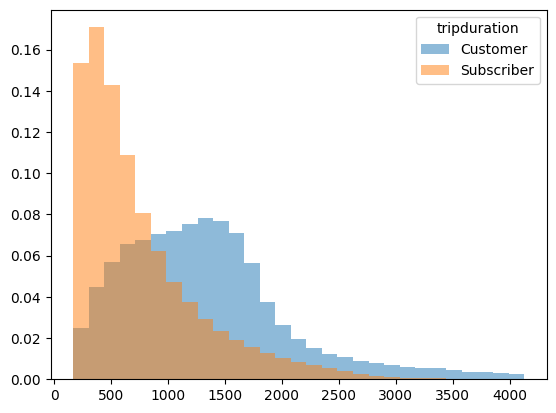

In [9]:
plot_numeric_column_histograms(df, 'tripduration')

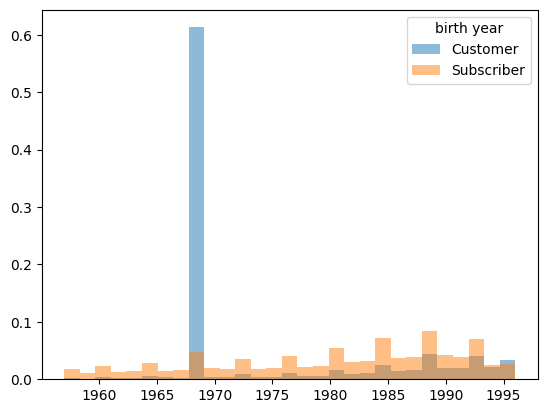

In [10]:
plot_numeric_column_histograms(df, 'birth year')

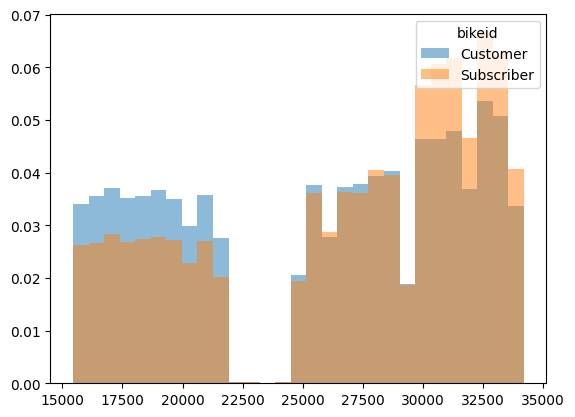

In [11]:
plot_numeric_column_histograms(df, 'bikeid')

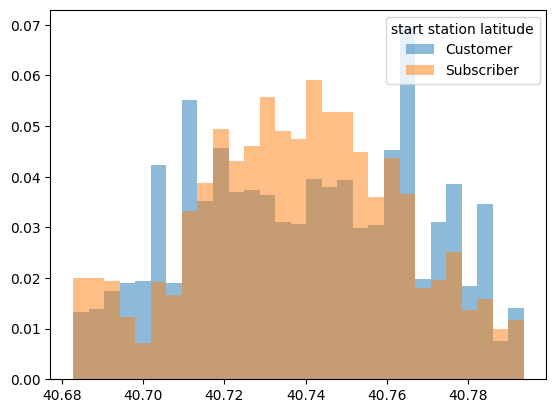

In [12]:
plot_numeric_column_histograms(df, 'start station latitude')

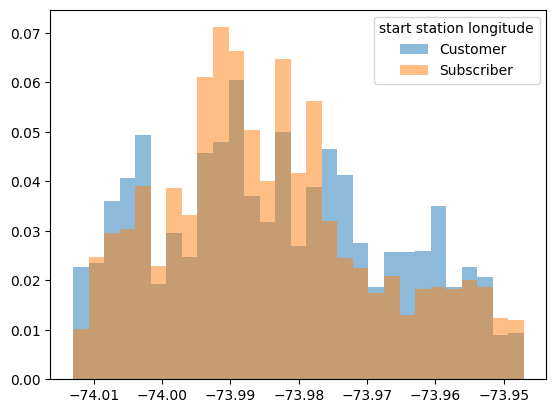

In [13]:
plot_numeric_column_histograms(df, 'start station longitude')

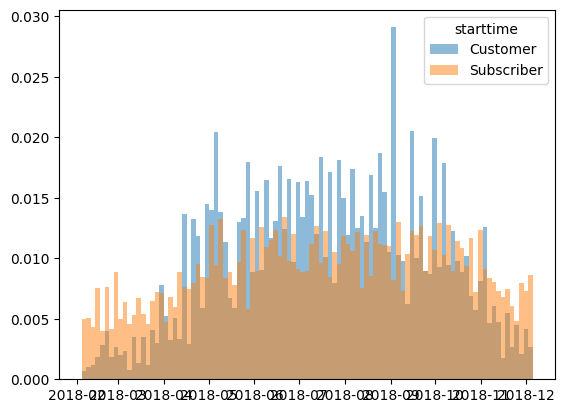

In [14]:
plot_numeric_column_histograms(df, 'starttime')

3    274481
2    273576
1    269787
4    259400
0    253960
5    224965
6    198663
Name: dayofweek, dtype: int64


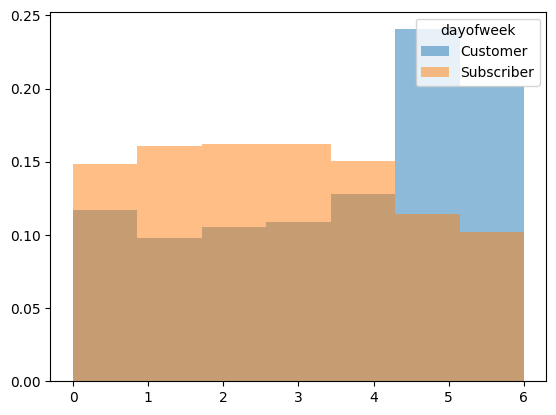

In [15]:
plot_category_column_histograms(df, 'dayofweek')

34    48684
40    48417
24    47879
38    47748
28    47747
25    45944
31    45207
23    45090
35    44268
18    44257
29    43982
26    43913
32    43831
39    43346
37    43060
41    42975
19    42513
44    42473
36    42340
22    41713
33    41652
21    41462
42    41061
30    40927
27    39539
43    36375
17    35625
20    33673
15    33027
16    32495
45    31229
49    29531
48    27701
13    27097
46    26729
50    26622
9     24959
51    23198
47    22538
11    22229
14    22206
7     22181
4     22026
8     21814
12    20610
10    20336
5     19129
3     18220
6     16601
2     15434
52    14817
1      8402
Name: weekofyear, dtype: Int64


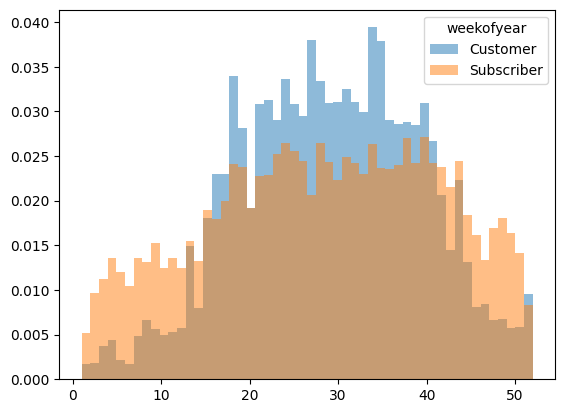

In [16]:
plot_category_column_histograms(df, 'weekofyear')

17    170858
18    162617
8     141232
16    125088
19    112750
9     111878
15    107546
14    101600
13    100213
12     95510
11     82893
7      80511
10     78243
20     77002
21     54911
22     40585
6      38394
23     26643
0      15456
5      11292
1       8551
2       4763
4       3190
3       3106
Name: hour, dtype: int64


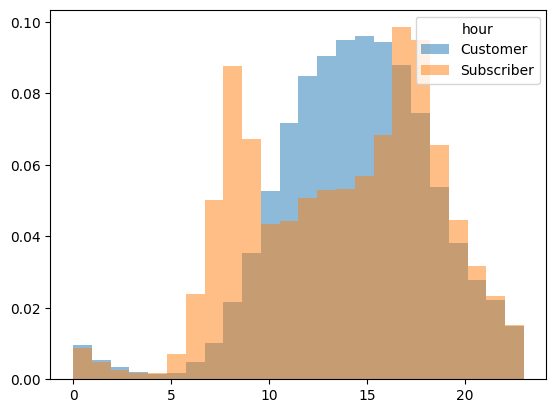

In [17]:
plot_category_column_histograms(df, 'hour')

1    1197258
2     408879
0     148695
Name: gender, dtype: int64


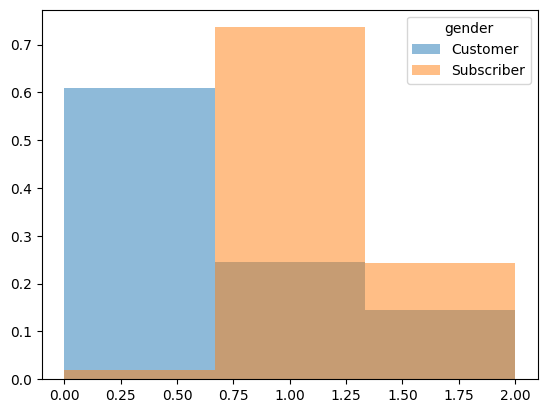

In [18]:
plot_category_column_histograms(df, 'gender')

In [19]:
# prepare data for bubble plot for coordinates
geo_df = df.groupby(['usertype', 'start station longitude', 'start station latitude']).size().to_frame('size').reset_index()
classes = {'Customer': u'#1f77b4', 'Subscriber': u'#ff7f0e'}
geo_df["color"] = geo_df['usertype'].map(classes)
sum_customer = geo_df[geo_df['usertype']=='Customer']['size'].sum()
sum_subscriber = geo_df[geo_df['usertype']=='Subscriber']['size'].sum()
geo_df.loc[geo_df['usertype']=='Customer', 'size'] /= sum_customer/10000
geo_df.loc[geo_df['usertype']=='Subscriber', 'size'] /= sum_subscriber/10000
#geo_df['size'] = geo_df['size']**(1/2)
geo_df = geo_df[geo_df['start station latitude']<42]
geo_df

,usertype,start station longitude,start station latitude,size,color
0,Customer,-74.025353,40.685126,18.315682,#1f77b4
1,Customer,-74.017134,40.708347,24.524387,#1f77b4
2,Customer,-74.016966,40.686931,22.299601,#1f77b4
3,Customer,-74.016777,40.705693,62.863145,#1f77b4
4,Customer,-74.016584,40.715338,49.100514,#1f77b4
...,...,...,...,...,...
1720,Subscriber,-73.881000,40.848000,0.012808,#ff7f0e
1721,Subscriber,-73.881000,40.860000,0.006404,#ff7f0e
1722,Subscriber,-73.881000,40.863000,0.006404,#ff7f0e
1723,Subscriber,-73.878000,40.839000,0.006404,#ff7f0e


Text(0, 0.5, 'start station latitude')

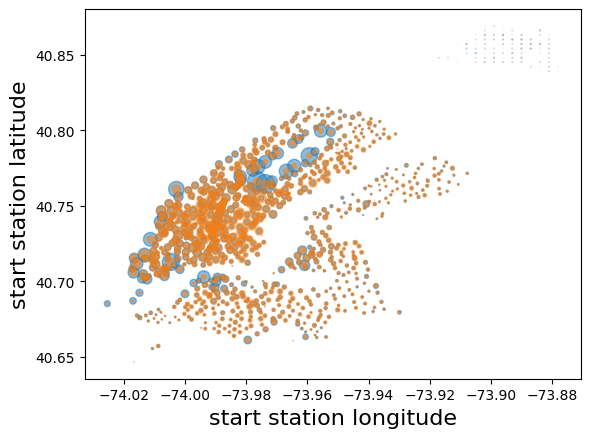

In [20]:
# plot the bubble plot
pyplot.scatter('start station longitude', 'start station latitude',
             s='size',
             c='color',
             alpha=0.5, data=geo_df)
pyplot.xlabel("start station longitude", size=16)
pyplot.ylabel("start station latitude", size=16)


In [21]:
# Test the most simple model: Customer means birth year==1969
tp = len(df[(df['usertype']=='Customer') & (df['birth year']==1969)])
tn = len(df[(df['usertype']=='Subscriber') & (df['birth year']!=1969)])
fp = len(df[(df['usertype']=='Subscriber') & (df['birth year']==1969)])
fn = len(df[(df['usertype']=='Customer') & (df['birth year']!=1969)])
tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
fpr = fp/(fp+tn)
fnr = fn/(fn+tp)
print("Sensitivity", tpr)
print("Specificity", tnr)
print("False positive rate", fpr)
print("False negative rate", fnr)



Sensitivity 0.609436197788666
Specificity 0.9689123982184425
False positive rate 0.031087601781557485
False negative rate 0.39056380221133397
